# 01 - Breast Cancer Project – EDA

## 1. Initial imports

In [1]:
# core libraries
import pandas as pd
import numpy as np
import math

# visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# settings
pd.set_option('display.max_columns', None)

## 2. Loading data

In [2]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN

## 3. Exploration
- No missing values detected.
- All features are numerical after removing ID and target.
- Mild class imbalance (~62% benign, ~38% malignant).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     569.000000              569.000000  569.000000  569.000000   
mean        0.181162                0.062798    0.405172    1.216853   
std         0.027414                0.007060    0.277313    0.551648   
min         0.106000                0.049960    0.111500    0.360200   
25%         0.161900                0.057700    0.232400    0.833900   
50%         0.179200                0.061540    0.324200    1.108000   
75%         0.195700                0.066120    0.478900    1.474000   
max         0.304000                0.097440    2.873000    4.885000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    569.000000  569.000000     569.000000      569.000000    569.000000   
mean       2.866059   40.337079       0.007041        0.025478      0.031894   
std        2.021855   45.491006       0.003003        0.017908      0.030186   
min        0.757000    6.802000       0.001713        0.002252      0.000000   
25%        1.606000   17.850000       0.005169        0.013080      0.015090   
50%        2.287000   24.530000       0.006380        0.020450      0.025890   
75%        3.357000   45.190000       0.008146        0.032450      0.042050   
max       21.980000  542.200000       0.031130        0.135400      0.396000   

       concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         569.000000   569.000000            569.000000    569.000000   
mean            0.011796     0.020542              0.003795     16.269190   
std             0.006170     0.008266              0.002646      4.833242   
min             0.000000     0.007882              0.000895      7.930000   
25%             0.007638     0.015160              0.002248     13.010000   
50%             0.010930     0.018730              0.003187     14.970000   
75%             0.014710     0.023480              0.004558     18.790000   
max             0.052790     0.078950              0.029840     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%    

In [5]:
df.describe(include='O')

diagnosis
count        569
unique         2
top            B
freq         357

<Axes: title={'center': 'Class Distribution'}, xlabel='diagnosis'>

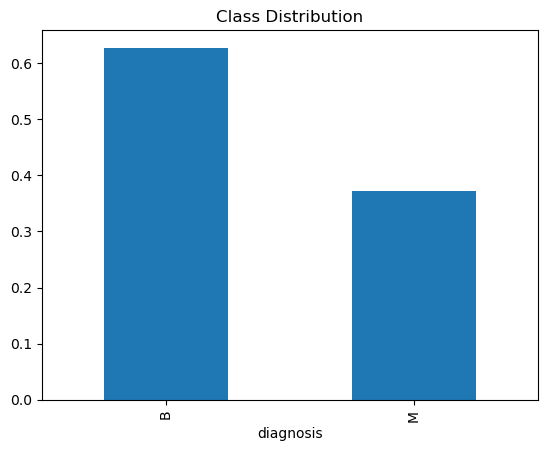

In [6]:
df['diagnosis'].value_counts(normalize=True).plot(kind='bar', title='Class Distribution')

In [7]:
# stardarlising column names and dropping Unnamed: 32

# new
df['concave_points_worst'] = df['concave points_worst']
df['concave_points_se'] = df['concave points_se']
df['concave_points_mean'] = df['concave points_mean']

#drop
df = df.drop(columns=['concave points_worst', 'concave points_se', 'concave points_mean', 'Unnamed: 32'], errors='ignore')

## 4. Visualization

A combination of plots was used to understand distributions, class separation, correlation structures, 
and multicollinearity in the dataset.

In [8]:
pd.DataFrame(df.isnull().sum().sort_values(ascending = False)).head(40)

0
id                       0
diagnosis                0
concave_points_se        0
concave_points_worst     0
fractal_dimension_worst  0
symmetry_worst           0
concavity_worst          0
compactness_worst        0
smoothness_worst         0
area_worst               0
perimeter_worst          0
texture_worst            0
radius_worst             0
fractal_dimension_se     0
symmetry_se              0
concavity_se             0
compactness_se           0
smoothness_se            0
area_se                  0
perimeter_se             0
texture_se               0
radius_se                0
fractal_dimension_mean   0
symmetry_mean            0
concavity_mean           0
compactness_mean         0
smoothness_mean          0
area_mean                0
perimeter_mean           0
texture_mean             0
radius_mean              0
concave_points_mean      0

### 4.1) Scatterplots

Used to visually inspect relationships and identify potential outliers or clusters between feature pairs.

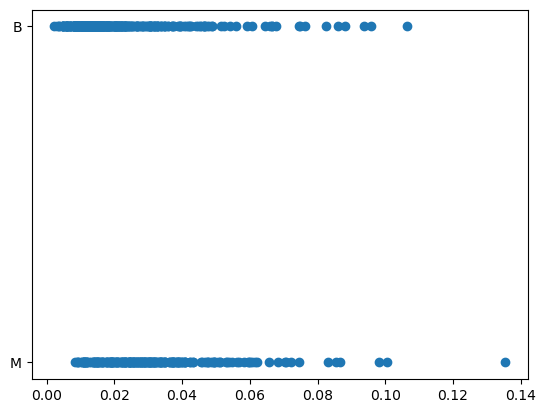

In [9]:
plt.scatter(x='compactness_se', y='diagnosis', data=df)

In [10]:
outliers = []

df.query('compactness_se > 0.12')
#874858

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
190  874858         M        14.22         23.12           94.37      609.9   

     smoothness_mean  compactness_mean  concavity_mean  symmetry_mean  \
190           0.1075            0.2413          0.1981         0.2384   

     fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
190                 0.07542      0.286        2.11         2.112    31.72   

     smoothness_se  compactness_se  concavity_se  symmetry_se  \
190        0.00797          0.1354        0.1166      0.05113   

     fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
190               0.01172         15.74          37.18            106.4   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
190       762.4            0.1533             0.9327           0.8488   

     symmetry_worst  fractal_dimension_worst  concave_points_worst  \
190          0.5166                   0.1446                0.1772   

     concave_points_se  concave_points_mean  
190            0.01666              0.06618

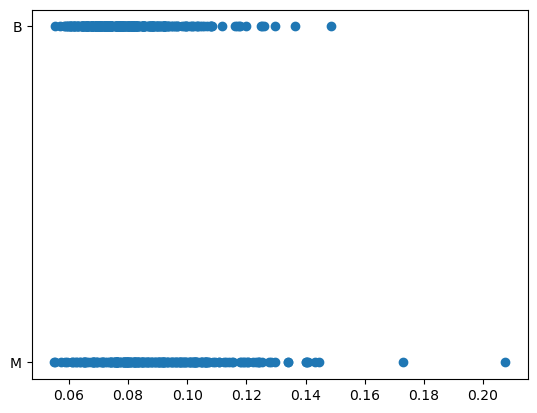

In [11]:
plt.scatter(x='fractal_dimension_worst', y='diagnosis', data=df)

In [12]:
df.query('fractal_dimension_worst > 0.15')
#84348301, 84501001

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
3  84348301         M        11.42         20.38           77.58      386.1   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  symmetry_mean  \
3           0.1425            0.2839          0.2414         0.2597   
9           0.1186            0.2396          0.2273         0.2030   

   fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
3                 0.09744     0.4956       1.156         3.445    27.23   
9                 0.08243     0.2976       1.599         2.039    23.94   

   smoothness_se  compactness_se  concavity_se  symmetry_se  \
3       0.009110         0.07458       0.05661      0.05963   
9       0.007149         0.07217       0.07743      0.01789   

   fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
3              0.009208         14.91          26.50            98.87   
9              0.010080         15.09          40.68            97.65   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
3       567.7            0.2098             0.8663           0.6869   
9       711.4            0.1853             1.0580           1.1050   

   symmetry_worst  fractal_dimension_worst  concave_points_worst  \
3          0.6638                   0.1730                0.2575   
9          0.4366                   0.2075                0.2210   

   concave_points_se  concave_points_mean  
3            0.01867              0.10520  
9            0.01432              0.08543

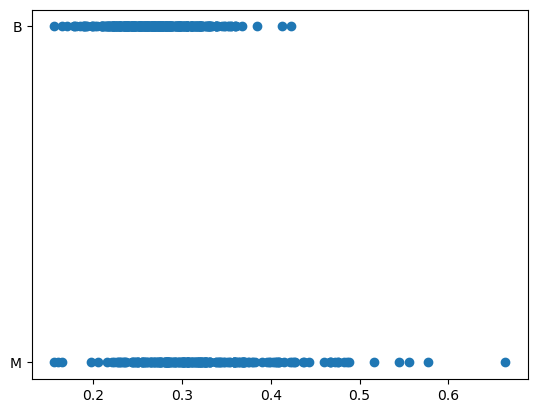

In [13]:
plt.scatter(x='symmetry_worst', y='diagnosis', data=df)

In [14]:
df.query('symmetry_worst > 0.6')
#84348301

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
3  84348301         M        11.42         20.38           77.58      386.1   

   smoothness_mean  compactness_mean  concavity_mean  symmetry_mean  \
3           0.1425            0.2839          0.2414         0.2597   

   fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
3                 0.09744     0.4956       1.156         3.445    27.23   

   smoothness_se  compactness_se  concavity_se  symmetry_se  \
3        0.00911         0.07458       0.05661      0.05963   

   fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
3              0.009208         14.91           26.5            98.87   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
3       567.7            0.2098             0.8663           0.6869   

   symmetry_worst  fractal_dimension_worst  concave_points_worst  \
3          0.6638                    0.173                0.2575   

   concave_points_se  concave_points_mean  
3            0.01867               0.1052

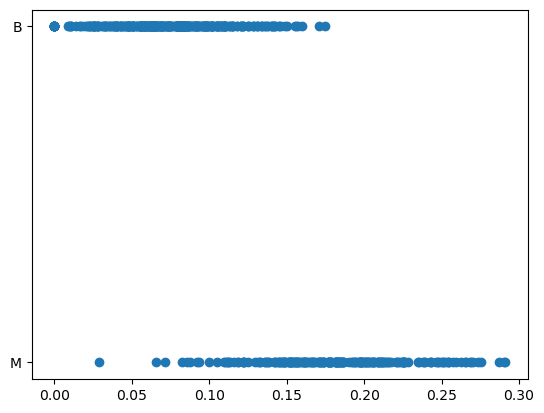

In [15]:
plt.scatter(x='concave_points_worst', y='diagnosis', data=df)

In [16]:
df.query('concave_points_worst > 0.28')
#8611555, 86355, 873593

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
82   8611555         M        25.22         24.91           171.5     1878.0   
108    86355         M        22.27         19.67           152.8     1509.0   
181   873593         M        21.09         26.57           142.7     1311.0   

     smoothness_mean  compactness_mean  concavity_mean  symmetry_mean  \
82            0.1063            0.2665          0.3339         0.1829   
108           0.1326            0.2768          0.4264         0.2556   
181           0.1141            0.2832          0.2487         0.2395   

     fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
82                  0.06782     0.8973      1.4740         7.382   120.00   
108                 0.07039     1.2150      1.5450        10.050   170.00   
181                 0.07398     0.6298      0.7629         4.414    81.46   

     smoothness_se  compactness_se  concavity_se  symmetry_se  \
82        0.008166         0.05693       0.05730      0.01065   
108       0.006515         0.08668       0.10400      0.03112   
181       0.004253         0.04759       0.03872      0.01798   

     fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
82               0.005893         30.00          33.62            211.7   
108              0.005037         28.40          28.01            206.8   
181              0.005295         26.68          33.48            176.5   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
82       2562.0            0.1573             0.6076           0.6476   
108      2360.0            0.1701             0.6997           0.9608   
181      2089.0            0.1491             0.7584           0.6780   

     symmetry_worst  fractal_dimension_worst  concave_points_worst  \
82           0.2355                  0.10510                0.2867   
108          0.4055                  0.09789                0.2910   
181          0.4098                  0.12840                0.2903   

     concave_points_se  concave_points_mean  
82             0.02030               0.1845  
108            0.02480               0.1823  
181            0.01567               0.1496

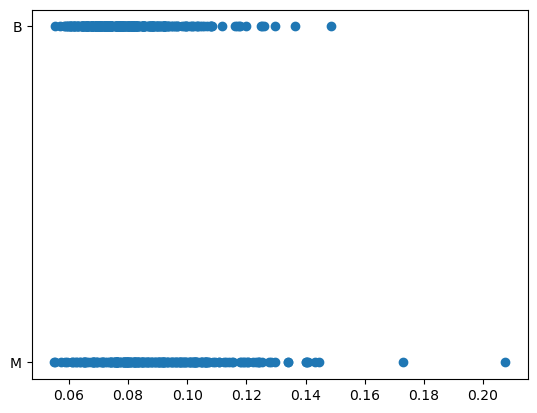

In [17]:
plt.scatter(x='fractal_dimension_worst', y='diagnosis', data=df)

In [18]:
df.query('fractal_dimension_worst > 0.2')
#84501001

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  symmetry_mean  \
9           0.1186            0.2396          0.2273          0.203   

   fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
9                 0.08243     0.2976       1.599         2.039    23.94   

   smoothness_se  compactness_se  concavity_se  symmetry_se  \
9       0.007149         0.07217       0.07743      0.01789   

   fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
9               0.01008         15.09          40.68            97.65   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
9       711.4            0.1853              1.058            1.105   

   symmetry_worst  fractal_dimension_worst  concave_points_worst  \
9          0.4366                   0.2075                 0.221   

   concave_points_se  concave_points_mean  
9            0.01432              0.08543

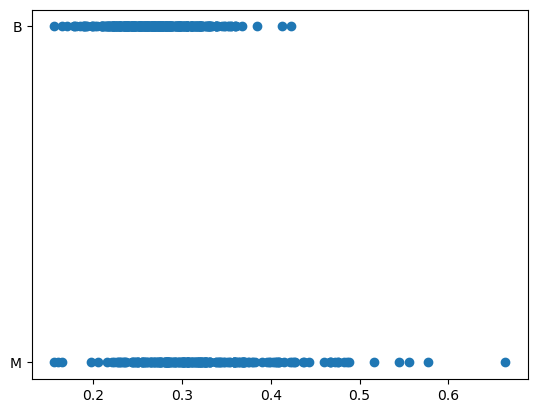

In [19]:
plt.scatter(x='symmetry_worst', y='diagnosis', data=df)

In [20]:
df.query('symmetry_worst > 0.6')
#84348301

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
3  84348301         M        11.42         20.38           77.58      386.1   

   smoothness_mean  compactness_mean  concavity_mean  symmetry_mean  \
3           0.1425            0.2839          0.2414         0.2597   

   fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
3                 0.09744     0.4956       1.156         3.445    27.23   

   smoothness_se  compactness_se  concavity_se  symmetry_se  \
3        0.00911         0.07458       0.05661      0.05963   

   fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
3              0.009208         14.91           26.5            98.87   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
3       567.7            0.2098             0.8663           0.6869   

   symmetry_worst  fractal_dimension_worst  concave_points_worst  \
3          0.6638                    0.173                0.2575   

   concave_points_se  concave_points_mean  
3            0.01867               0.1052

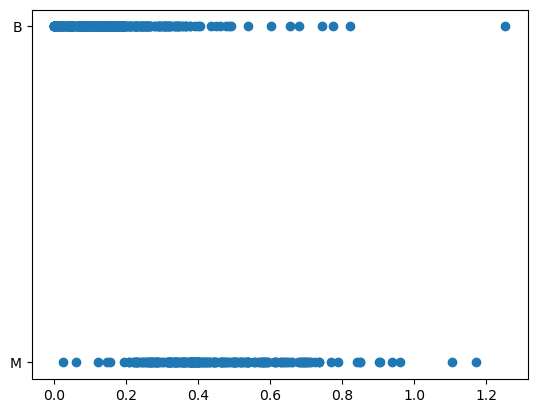

In [21]:
plt.scatter(x='concavity_worst', y='diagnosis', data=df)

In [22]:
df.query('concavity_worst > 1.1')
#859471, 84501001, 925622

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
9    84501001         M       12.460         24.04           83.97      475.9   
68     859471         B        9.029         17.33           58.79      250.5   
562    925622         M       15.220         30.62          103.40      716.9   

     smoothness_mean  compactness_mean  concavity_mean  symmetry_mean  \
9             0.1186            0.2396          0.2273         0.2030   
68            0.1066            0.1413          0.3130         0.2111   
562           0.1048            0.2087          0.2550         0.2128   

     fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
9                   0.08243     0.2976       1.599         2.039    23.94   
68                  0.08046     0.3274       1.194         1.885    17.67   
562                 0.07152     0.2602       1.205         2.362    22.65   

     smoothness_se  compactness_se  concavity_se  symmetry_se  \
9         0.007149         0.07217       0.07743      0.01789   
68        0.009549         0.08606       0.30380      0.04197   
562       0.004625         0.04844       0.07359      0.02137   

     fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
9                0.010080         15.09          40.68            97.65   
68               0.009559         10.31          22.65            65.50   
562              0.006142         17.52          42.79           128.70   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
9         711.4            0.1853             1.0580            1.105   
68        324.7            0.1482             0.4365            1.252   
562       915.0            0.1417             0.7917            1.170   

     symmetry_worst  fractal_dimension_worst  concave_points_worst  \
9            0.4366                   0.2075                0.2210   
68           0.4228                   0.1175                0.1750   
562          0.4089                   0.1409                0.2356   

     concave_points_se  concave_points_mean  
9              0.01432              0.08543  
68             0.03322              0.04375  
562            0.01608              0.09429

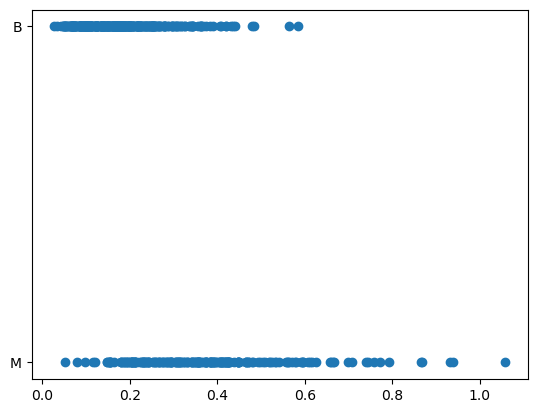

In [23]:
plt.scatter(x='compactness_worst', y='diagnosis', data=df)

In [24]:
df.query('compactness_worst > 1')
#84501001


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  symmetry_mean  \
9           0.1186            0.2396          0.2273          0.203   

   fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
9                 0.08243     0.2976       1.599         2.039    23.94   

   smoothness_se  compactness_se  concavity_se  symmetry_se  \
9       0.007149         0.07217       0.07743      0.01789   

   fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
9               0.01008         15.09          40.68            97.65   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
9       711.4            0.1853              1.058            1.105   

   symmetry_worst  fractal_dimension_worst  concave_points_worst  \
9          0.4366                   0.2075                 0.221   

   concave_points_se  concave_points_mean  
9            0.01432              0.08543

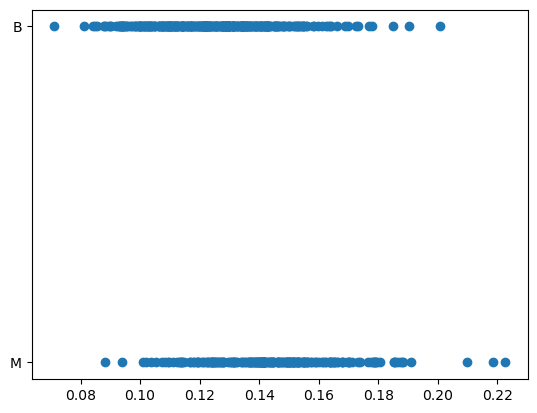

In [25]:
plt.scatter(x='smoothness_worst', y='diagnosis', data=df)

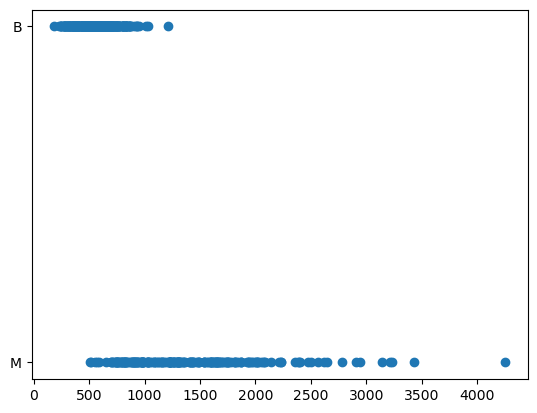

In [26]:
plt.scatter(x='area_worst', y='diagnosis', data=df)

In [27]:
df.query('area_worst > 2500')
#get rid of all MAYBE

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
23      851509         M        21.16         23.04           137.2   
82     8611555         M        25.22         24.91           171.5   
180     873592         M        27.22         21.87           182.1   
236   88299702         M        23.21         26.97           153.5   
265   88995002         M        20.73         31.12           135.7   
339      89812         M        23.51         24.27           155.1   
352     899987         M        25.73         17.46           174.2   
368    9011971         M        21.71         17.25           140.9   
461  911296202         M        27.42         26.27           186.9   
503     915143         M        23.09         19.83           152.1   
521   91762702         M        24.63         21.60           165.5   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
23      1404.0          0.09428           0.10220          0.1097   
82      1878.0          0.10630           0.26650          0.3339   
180     2250.0          0.10940           0.19140          0.2871   
236     1670.0          0.09509           0.16820          0.1950   
265     1419.0          0.09469           0.11430          0.1367   
339     1747.0          0.10690           0.12830          0.2308   
352     2010.0          0.11490           0.23630          0.3368   
368     1546.0          0.09384           0.08562          0.1168   
461     2501.0          0.10840           0.19880          0.3635   
503     1682.0          0.09342           0.12750          0.1676   
521     1841.0          0.10300           0.21060          0.2310   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
23          0.1769                 0.05278     0.6917      1.1270   
82          0.1829                 0.06782     0.8973      1.4740   
180         0.1800                 0.05770     0.8361      1.4810   
236         0.1909                 0.06309     1.0580      0.9635   
265         0.1769                 0.05674     1.1720      1.6170   
339         0.1797                 0.05506     1.0090      0.9245   
352         0.1956                 0.06121     0.9948      0.8509   
368         0.1717                 0.05054     1.2070      1.0510   
461         0.2061                 0.05623     2.5470      1.3060   
503         0.1505                 0.05484     1.2910      0.7452   
521         0.1991                 0.06739     0.9915      0.9004   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
23          4.303    93.99       0.004728         0.01259       0.01715   
82          7.382   120.00       0.008166         0.05693       0.05730   
180         5.820   128.70       0.004631         0.02537       0.03109   
236         7.247   155.80       0.006428         0.02863       0.04497   
265         7.749   199.70       0.004551         0.01478       0.02143   
339         6.462   164.10       0.006292         0.01971       0.03582   
352         7.222   153.10       0.006369         0.04243       0.04266   
368         7.733   224.10       0.005568         0.01112       0.02096   
461        18.650   542.20       0.007650         0.05374       0.08055   
503         9.635   180.20       0.005753         0.03356       0.03976   
521         7.050   139.90       0.004989         0.03212       0.03571   

     symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
23       0.01083              0.001987         29.17          35.59   
82       0.01065              0.005893         30.00          33.62   
180      0.01575              0.002747         33.12          32.85   
236      0.01590              0.003053         31.01          34.51   
265      0.01367              0.002299         32.49          47.16   
339      0.01479              0.003118         30.67          30.73   
352      0.02335              0.003385         33.13          23.58   
368      0.01263              0.

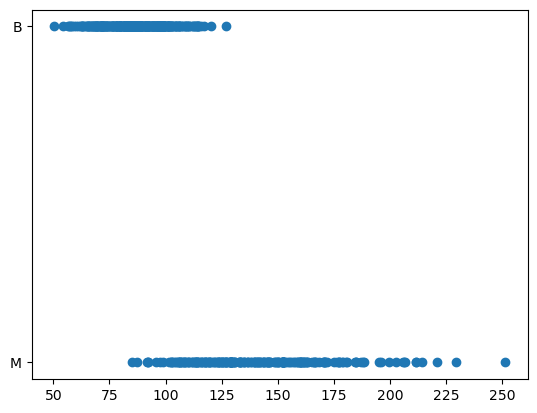

In [28]:
plt.scatter(x='perimeter_worst', y='diagnosis', data=df)

In [29]:
df.query('perimeter_worst > 200')
#get rid of all MAYBE 

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
82     8611555         M        25.22         24.91           171.5   
108      86355         M        22.27         19.67           152.8   
180     873592         M        27.22         21.87           182.1   
236   88299702         M        23.21         26.97           153.5   
265   88995002         M        20.73         31.12           135.7   
339      89812         M        23.51         24.27           155.1   
352     899987         M        25.73         17.46           174.2   
461  911296202         M        27.42         26.27           186.9   
503     915143         M        23.09         19.83           152.1   
521   91762702         M        24.63         21.60           165.5   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
82      1878.0          0.10630            0.2665          0.3339   
108     1509.0          0.13260            0.2768          0.4264   
180     2250.0          0.10940            0.1914          0.2871   
236     1670.0          0.09509            0.1682          0.1950   
265     1419.0          0.09469            0.1143          0.1367   
339     1747.0          0.10690            0.1283          0.2308   
352     2010.0          0.11490            0.2363          0.3368   
461     2501.0          0.10840            0.1988          0.3635   
503     1682.0          0.09342            0.1275          0.1676   
521     1841.0          0.10300            0.2106          0.2310   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
82          0.1829                 0.06782     0.8973      1.4740   
108         0.2556                 0.07039     1.2150      1.5450   
180         0.1800                 0.05770     0.8361      1.4810   
236         0.1909                 0.06309     1.0580      0.9635   
265         0.1769                 0.05674     1.1720      1.6170   
339         0.1797                 0.05506     1.0090      0.9245   
352         0.1956                 0.06121     0.9948      0.8509   
461         0.2061                 0.05623     2.5470      1.3060   
503         0.1505                 0.05484     1.2910      0.7452   
521         0.1991                 0.06739     0.9915      0.9004   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
82          7.382    120.0       0.008166         0.05693       0.05730   
108        10.050    170.0       0.006515         0.08668       0.10400   
180         5.820    128.7       0.004631         0.02537       0.03109   
236         7.247    155.8       0.006428         0.02863       0.04497   
265         7.749    199.7       0.004551         0.01478       0.02143   
339         6.462    164.1       0.006292         0.01971       0.03582   
352         7.222    153.1       0.006369         0.04243       0.04266   
461        18.650    542.2       0.007650         0.05374       0.08055   
503         9.635    180.2       0.005753         0.03356       0.03976   
521         7.050    139.9       0.004989         0.03212       0.03571   

     symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
82       0.01065              0.005893         30.00          33.62   
108      0.03112              0.005037         28.40          28.01   
180      0.01575              0.002747         33.12          32.85   
236      0.01590              0.003053         31.01          34.51   
265      0.01367              0.002299         32.49          47.16   
339      0.01479              0.003118         30.67          30.73   
352      0.02335              0.003385         33.13          23.58   
461      0.01697              0.004558         36.04          31.37   
503      0.02201              0.002897         30.79          23.87   
521      0.01879              0.004760         29.92          26.93   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
82             211.7      256

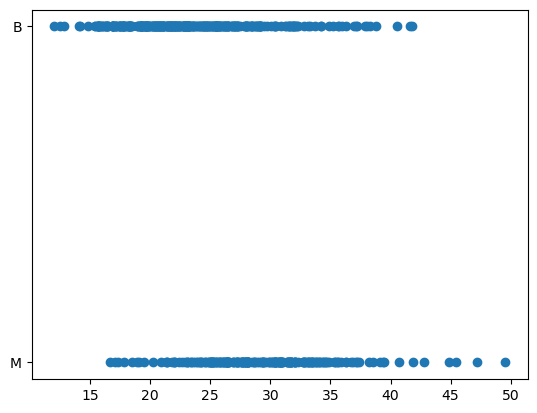

In [30]:
plt.scatter(x='texture_worst', y='diagnosis', data=df)

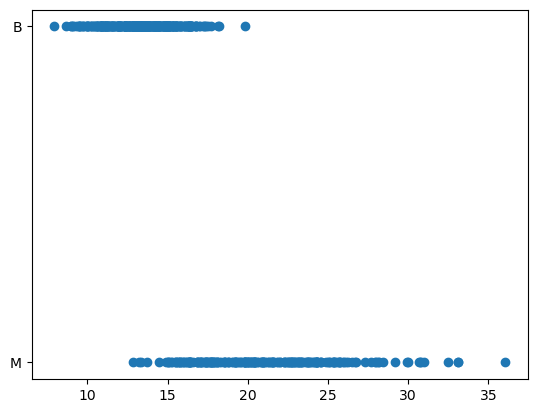

In [31]:
plt.scatter(x='radius_worst', y='diagnosis', data=df)

In [32]:
df.query('radius_worst > 30')
#get rid of all MAYBE 

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
180     873592         M        27.22         21.87           182.1   
236   88299702         M        23.21         26.97           153.5   
265   88995002         M        20.73         31.12           135.7   
339      89812         M        23.51         24.27           155.1   
352     899987         M        25.73         17.46           174.2   
368    9011971         M        21.71         17.25           140.9   
461  911296202         M        27.42         26.27           186.9   
503     915143         M        23.09         19.83           152.1   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
180     2250.0          0.10940           0.19140          0.2871   
236     1670.0          0.09509           0.16820          0.1950   
265     1419.0          0.09469           0.11430          0.1367   
339     1747.0          0.10690           0.12830          0.2308   
352     2010.0          0.11490           0.23630          0.3368   
368     1546.0          0.09384           0.08562          0.1168   
461     2501.0          0.10840           0.19880          0.3635   
503     1682.0          0.09342           0.12750          0.1676   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
180         0.1800                 0.05770     0.8361      1.4810   
236         0.1909                 0.06309     1.0580      0.9635   
265         0.1769                 0.05674     1.1720      1.6170   
339         0.1797                 0.05506     1.0090      0.9245   
352         0.1956                 0.06121     0.9948      0.8509   
368         0.1717                 0.05054     1.2070      1.0510   
461         0.2061                 0.05623     2.5470      1.3060   
503         0.1505                 0.05484     1.2910      0.7452   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
180         5.820    128.7       0.004631         0.02537       0.03109   
236         7.247    155.8       0.006428         0.02863       0.04497   
265         7.749    199.7       0.004551         0.01478       0.02143   
339         6.462    164.1       0.006292         0.01971       0.03582   
352         7.222    153.1       0.006369         0.04243       0.04266   
368         7.733    224.1       0.005568         0.01112       0.02096   
461        18.650    542.2       0.007650         0.05374       0.08055   
503         9.635    180.2       0.005753         0.03356       0.03976   

     symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
180      0.01575              0.002747         33.12          32.85   
236      0.01590              0.003053         31.01          34.51   
265      0.01367              0.002299         32.49          47.16   
339      0.01479              0.003118         30.67          30.73   
352      0.02335              0.003385         33.13          23.58   
368      0.01263              0.001803         30.75          26.44   
461      0.01697              0.004558         36.04          31.37   
503      0.02201              0.002897         30.79          23.87   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
180            220.8      3216.0            0.1472             0.4034   
236            206.0      2944.0            0.1481             0.4126   
265            214.0      3432.0            0.1401             0.2644   
339            202.4      2906.0            0.1515             0.2678   
352            229.3      3234.0            0.1530             0.5937   
368            199.5      3143.0            0.1363             0.1628   
461            251.2      4254.0            0.1357             0.4256   
503            211.5      2782.0            0.1199             0.3625   

     concavity_worst  symmetry_worst  fractal_dimension_worst  \
180           0.5340          0.2856                  0.08082   
236           0.5820    

In [33]:
df.query("diagnosis == 'B' & radius_worst > 19")
#91376702

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
491  91376702         B        17.85         13.23           114.6      992.1   

     smoothness_mean  compactness_mean  concavity_mean  symmetry_mean  \
491          0.07838           0.06217         0.04445          0.122   

     fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
491                 0.05243     0.4834       1.046         3.163    50.95   

     smoothness_se  compactness_se  concavity_se  symmetry_se  \
491       0.004369        0.008274       0.01153      0.01302   

     fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
491              0.001309         19.82          18.42            127.1   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
491      1210.0           0.09862            0.09976           0.1048   

     symmetry_worst  fractal_dimension_worst  concave_points_worst  \
491          0.1783                  0.05871               0.08341   

     concave_points_se  concave_points_mean  
491           0.007437              0.04178

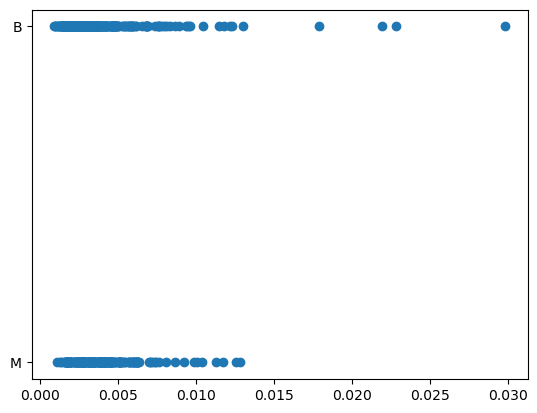

In [34]:
plt.scatter(x='fractal_dimension_se', y='diagnosis', data=df)
#no effect on diagnosis whatsoever

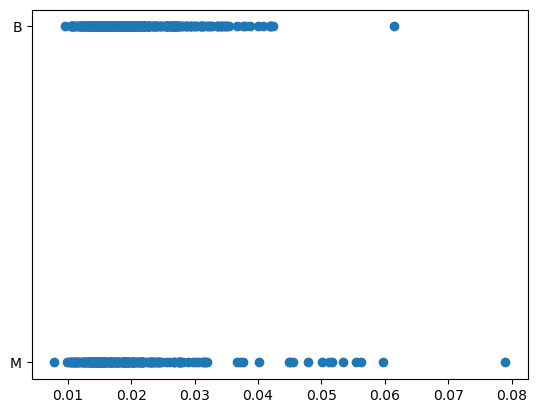

In [35]:
plt.scatter(x='symmetry_se', y='diagnosis', data=df)

In [36]:
df.query("symmetry_se > 0.058")
#84348301, 8610862, 894047

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
3    84348301         M       11.420         20.38           77.58      386.1   
78    8610862         M       20.180         23.97          143.70     1245.0   
314    894047         B        8.597         18.60           54.09      221.2   

     smoothness_mean  compactness_mean  concavity_mean  symmetry_mean  \
3             0.1425           0.28390          0.2414         0.2597   
78            0.1286           0.34540          0.3754         0.2906   
314           0.1074           0.05847          0.0000         0.2163   

     fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
3                   0.09744     0.4956       1.156         3.445    27.23   
78                  0.08142     0.9317       1.885         8.649   116.40   
314                 0.07359     0.3368       2.777         2.222    17.81   

     smoothness_se  compactness_se  concavity_se  symmetry_se  \
3          0.00911         0.07458       0.05661      0.05963   
78         0.01038         0.06835       0.10910      0.07895   
314        0.02075         0.01403       0.00000      0.06146   

     fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
3                0.009208        14.910          26.50            98.87   
78               0.005987        23.370          31.72           170.30   
314              0.006820         8.952          22.44            56.65   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
3         567.7            0.2098            0.86630           0.6869   
78       1623.0            0.1639            0.61640           0.7681   
314       240.1            0.1347            0.07767           0.0000   

     symmetry_worst  fractal_dimension_worst  concave_points_worst  \
3            0.6638                  0.17300                0.2575   
78           0.5440                  0.09964                0.2508   
314          0.3142                  0.08116                0.0000   

     concave_points_se  concave_points_mean  
3              0.01867               0.1052  
78             0.02593               0.1604  
314            0.00000               0.0000

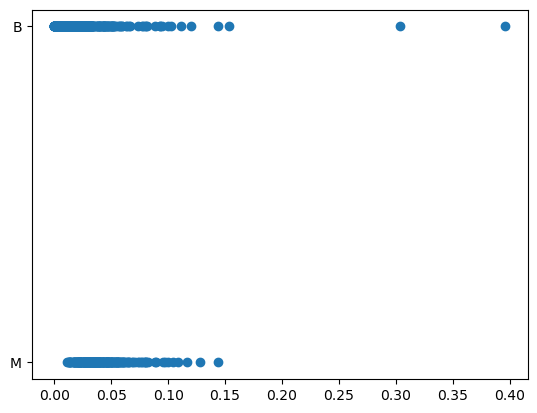

In [37]:
plt.scatter(x='concavity_se', y='diagnosis', data=df)
#no effect on diagnosis whatsoever

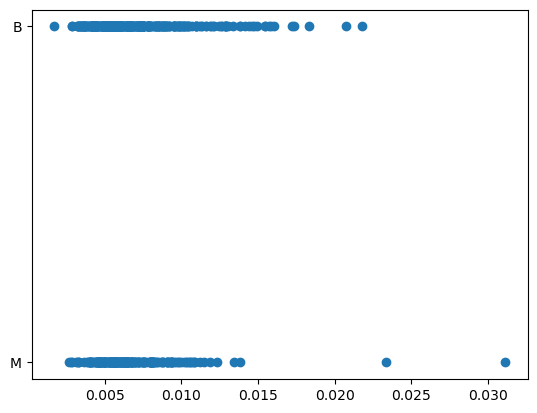

In [38]:
plt.scatter(x='smoothness_se', y='diagnosis', data=df)

In [39]:
df.query("smoothness_se > 0.020")
#pretty strange, MAYBE drop

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
122     865423         M       24.250         20.20          166.20   
213  881094802         M       17.420         25.56          114.50   
314     894047         B        8.597         18.60           54.09   
505     915276         B        9.676         13.14           64.12   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
122     1761.0           0.1447           0.28670          0.4268   
213      948.0           0.1006           0.11460          0.1682   
314      221.2           0.1074           0.05847          0.0000   
505      272.5           0.1255           0.22040          0.1188   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
122         0.2655                 0.06877     1.5090       3.120   
213         0.1308                 0.05866     0.5296       1.667   
314         0.2163                 0.07359     0.3368       2.777   
505         0.2057                 0.09575     0.2744       1.390   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
122         9.807   233.00        0.02333         0.09806       0.12780   
213         3.767    58.53        0.03113         0.08555       0.14380   
314         2.222    17.81        0.02075         0.01403       0.00000   
505         1.787    17.67        0.02177         0.04888       0.05189   

     symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
122      0.04547              0.009875        26.020          23.99   
213      0.02175              0.012560        18.070          28.07   
314      0.06146              0.006820         8.952          22.44   
505      0.02632              0.011480        10.600          18.04   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
122           180.90      2073.0            0.1696            0.42440   
213           120.40      1021.0            0.1243            0.17930   
314            56.65       240.1            0.1347            0.07767   
505            69.47       328.1            0.2006            0.36630   

     concavity_worst  symmetry_worst  fractal_dimension_worst  \
122           0.5803          0.3222                  0.08009   
213           0.2803          0.1603                  0.06818   
314           0.0000          0.3142                  0.08116   
505           0.2913          0.2848                  0.13640   

     concave_points_worst  concave_points_se  concave_points_mean  
122                0.2248            0.01822              0.20120  
213                0.1099            0.03927              0.06597  
314                0.0000            0.00000              0.00000  
505                0.1075            0.01450              0.07038

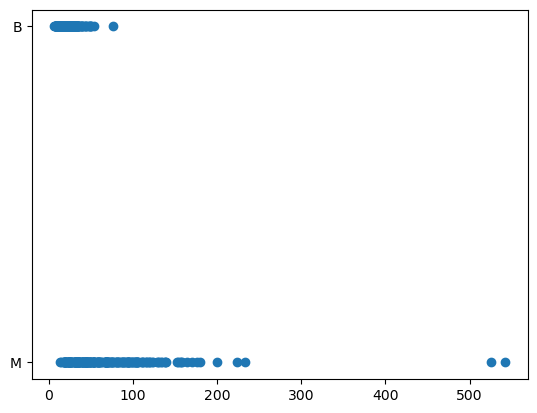

In [40]:
plt.scatter(x='area_se', y='diagnosis', data=df)

In [41]:
df.query("area_se > 200")
#get rid of all MAYBE 

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
122     865423         M        24.25         20.20           166.2   
212    8810703         M        28.11         18.47           188.5   
368    9011971         M        21.71         17.25           140.9   
461  911296202         M        27.42         26.27           186.9   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
122     1761.0          0.14470           0.28670          0.4268   
212     2499.0          0.11420           0.15160          0.3201   
368     1546.0          0.09384           0.08562          0.1168   
461     2501.0          0.10840           0.19880          0.3635   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
122         0.2655                 0.06877      1.509       3.120   
212         0.1648                 0.05525      2.873       1.476   
368         0.1717                 0.05054      1.207       1.051   
461         0.2061                 0.05623      2.547       1.306   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
122         9.807    233.0       0.023330         0.09806       0.12780   
212        21.980    525.6       0.013450         0.02772       0.06389   
368         7.733    224.1       0.005568         0.01112       0.02096   
461        18.650    542.2       0.007650         0.05374       0.08055   

     symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
122      0.04547              0.009875         26.02          23.99   
212      0.04783              0.004476         28.11          18.47   
368      0.01263              0.001803         30.75          26.44   
461      0.01697              0.004558         36.04          31.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
122            180.9      2073.0            0.1696             0.4244   
212            188.5      2499.0            0.1142             0.1516   
368            199.5      3143.0            0.1363             0.1628   
461            251.2      4254.0            0.1357             0.4256   

     concavity_worst  symmetry_worst  fractal_dimension_worst  \
122           0.5803          0.3222                  0.08009   
212           0.3201          0.1648                  0.05525   
368           0.2861          0.2510                  0.06494   
461           0.6833          0.2641                  0.07427   

     concave_points_worst  concave_points_se  concave_points_mean  
122                0.2248            0.01822              0.20120  
212                0.1595            0.01407              0.15950  
368                0.1820            0.01197              0.08465  
461                0.2625            0.02598              0.16890

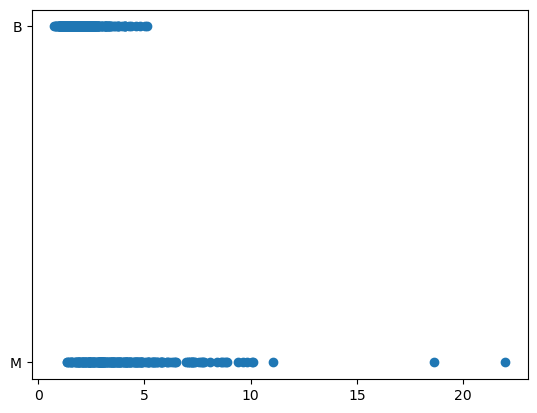

In [42]:
plt.scatter(x='perimeter_se', y='diagnosis', data=df)

In [43]:
df.query("perimeter_se > 10")
#get rid of all MAYBE 

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
12      846226         M        19.17         24.80           132.4   
108      86355         M        22.27         19.67           152.8   
212    8810703         M        28.11         18.47           188.5   
258     887181         M        15.66         23.20           110.2   
461  911296202         M        27.42         26.27           186.9   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
12      1123.0           0.0974            0.2458          0.2065   
108     1509.0           0.1326            0.2768          0.4264   
212     2499.0           0.1142            0.1516          0.3201   
258      773.5           0.1109            0.3114          0.3176   
461     2501.0           0.1084            0.1988          0.3635   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
12          0.2397                 0.07800     0.9555       3.568   
108         0.2556                 0.07039     1.2150       1.545   
212         0.1648                 0.05525     2.8730       1.476   
258         0.2495                 0.08104     1.2920       2.454   
461         0.2061                 0.05623     2.5470       1.306   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
12          11.07    116.2       0.003139         0.08297       0.08890   
108         10.05    170.0       0.006515         0.08668       0.10400   
212         21.98    525.6       0.013450         0.02772       0.06389   
258         10.12    138.5       0.012360         0.05995       0.08232   
461         18.65    542.2       0.007650         0.05374       0.08055   

     symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
12       0.04484              0.012840         20.96          29.94   
108      0.03112              0.005037         28.40          28.01   
212      0.04783              0.004476         28.11          18.47   
258      0.02337              0.006042         19.85          31.64   
461      0.01697              0.004558         36.04          31.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
12             151.7      1332.0            0.1037             0.3903   
108            206.8      2360.0            0.1701             0.6997   
212            188.5      2499.0            0.1142             0.1516   
258            143.7      1226.0            0.1504             0.5172   
461            251.2      4254.0            0.1357             0.4256   

     concavity_worst  symmetry_worst  fractal_dimension_worst  \
12            0.3639          0.3176                  0.10230   
108           0.9608          0.4055                  0.09789   
212           0.3201          0.1648                  0.05525   
258           0.6181          0.3277                  0.10190   
461           0.6833          0.2641                  0.07427   

     concave_points_worst  concave_points_se  concave_points_mean  
12                 0.1767            0.04090               0.1118  
108                0.2910            0.02480               0.1823  
212                0.1595            0.01407               0.1595  
258                0.2462            0.03024               0.1377  
461                0.2625            0.02598               0.1689

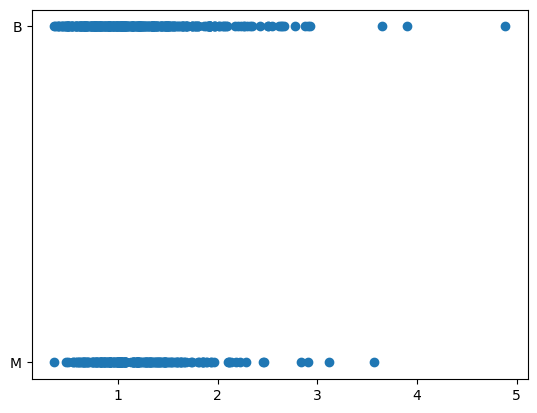

In [44]:
plt.scatter(x='texture_se', y='diagnosis', data=df)
#not very trustable

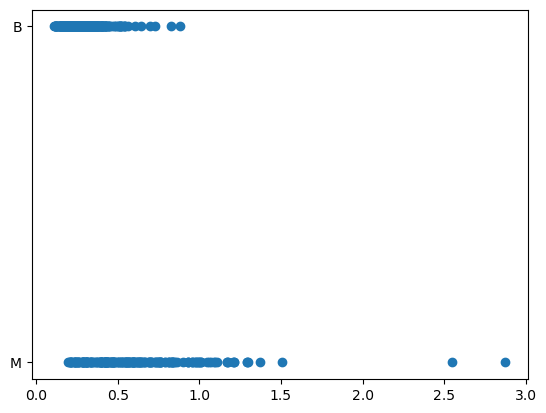

In [45]:
plt.scatter(x='radius_se', y='diagnosis', data=df)

In [46]:
df.query("radius_se > 2.5")
#8810703, 911296202

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
212    8810703         M        28.11         18.47           188.5   
461  911296202         M        27.42         26.27           186.9   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
212     2499.0           0.1142            0.1516          0.3201   
461     2501.0           0.1084            0.1988          0.3635   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
212         0.1648                 0.05525      2.873       1.476   
461         0.2061                 0.05623      2.547       1.306   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
212         21.98    525.6        0.01345         0.02772       0.06389   
461         18.65    542.2        0.00765         0.05374       0.08055   

     symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
212      0.04783              0.004476         28.11          18.47   
461      0.01697              0.004558         36.04          31.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
212            188.5      2499.0            0.1142             0.1516   
461            251.2      4254.0            0.1357             0.4256   

     concavity_worst  symmetry_worst  fractal_dimension_worst  \
212           0.3201          0.1648                  0.05525   
461           0.6833          0.2641                  0.07427   

     concave_points_worst  concave_points_se  concave_points_mean  
212                0.1595            0.01407               0.1595  
461                0.2625            0.02598               0.1689

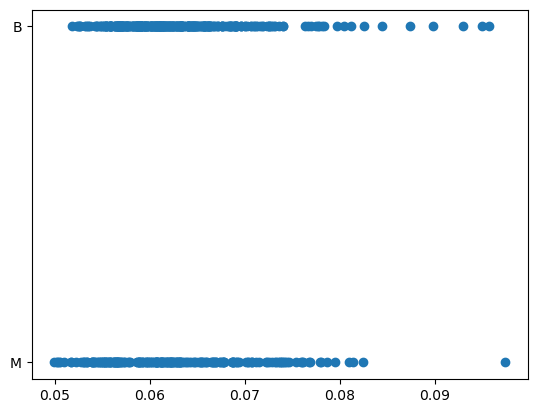

In [47]:
plt.scatter(x='fractal_dimension_mean', y='diagnosis', data=df)
#not very trustable

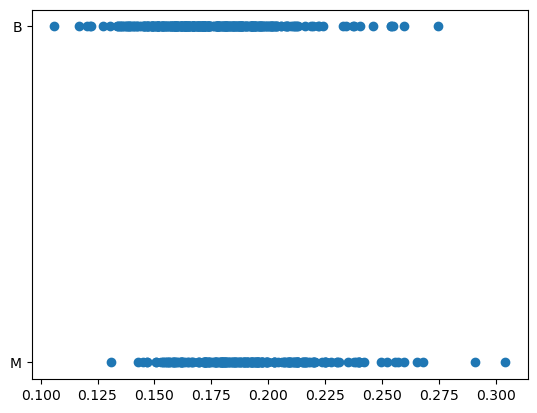

In [48]:
plt.scatter(x='symmetry_mean', y='diagnosis', data=df)

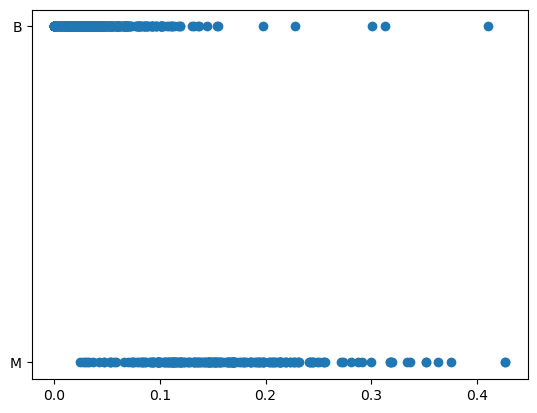

In [49]:
plt.scatter(x='concavity_mean', y='diagnosis', data=df)

In [50]:
df.query("concavity_mean > 0.4")
#8710441

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
108    86355         M       22.270         19.67          152.80     1509.0   
122   865423         M       24.250         20.20          166.20     1761.0   
152  8710441         B        9.731         15.34           63.78      300.2   

     smoothness_mean  compactness_mean  concavity_mean  symmetry_mean  \
108           0.1326            0.2768          0.4264         0.2556   
122           0.1447            0.2867          0.4268         0.2655   
152           0.1072            0.1599          0.4108         0.2548   

     fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
108                 0.07039     1.2150       1.545        10.050   170.00   
122                 0.06877     1.5090       3.120         9.807   233.00   
152                 0.09296     0.8245       2.664         4.073    49.85   

     smoothness_se  compactness_se  concavity_se  symmetry_se  \
108       0.006515         0.08668        0.1040      0.03112   
122       0.023330         0.09806        0.1278      0.04547   
152       0.010970         0.09586        0.3960      0.03546   

     fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
108              0.005037         28.40          28.01           206.80   
122              0.009875         26.02          23.99           180.90   
152              0.029840         11.02          19.49            71.04   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
108      2360.0            0.1701             0.6997           0.9608   
122      2073.0            0.1696             0.4244           0.5803   
152       380.5            0.1292             0.2772           0.8216   

     symmetry_worst  fractal_dimension_worst  concave_points_worst  \
108          0.4055                  0.09789                0.2910   
122          0.3222                  0.08009                0.2248   
152          0.3108                  0.12590                0.1571   

     concave_points_se  concave_points_mean  
108            0.02480              0.18230  
122            0.01822              0.20120  
152            0.05279              0.07857

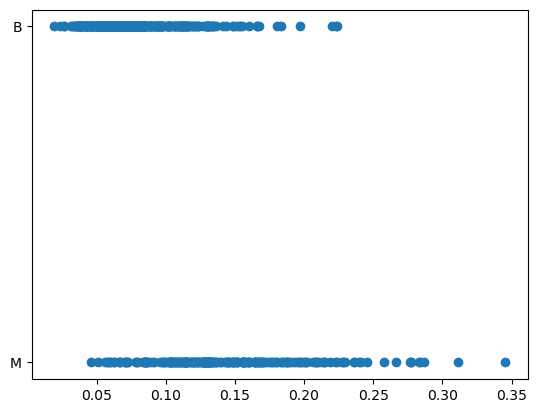

In [51]:
plt.scatter(x='compactness_mean', y='diagnosis', data=df)

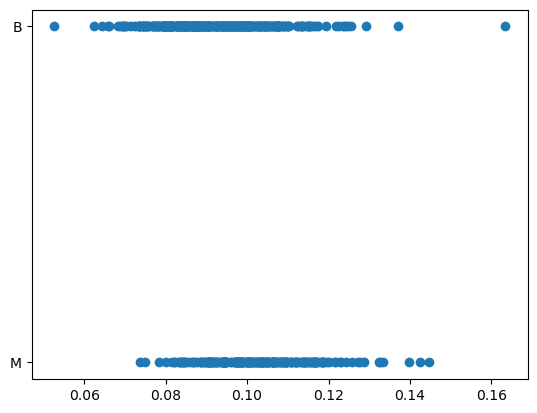

In [52]:
plt.scatter(x='smoothness_mean', y='diagnosis', data=df)
#not very trustable

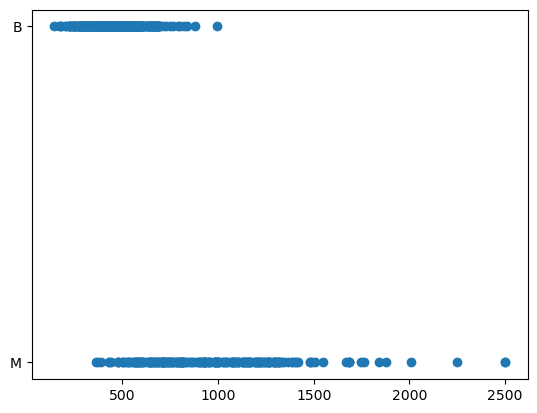

In [53]:
plt.scatter(x='area_mean', y='diagnosis', data=df)

In [54]:
df.query("area_mean > 2000")
#873592, 8810703, 899987, 911296202

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
180     873592         M        27.22         21.87           182.1   
212    8810703         M        28.11         18.47           188.5   
352     899987         M        25.73         17.46           174.2   
461  911296202         M        27.42         26.27           186.9   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
180     2250.0           0.1094            0.1914          0.2871   
212     2499.0           0.1142            0.1516          0.3201   
352     2010.0           0.1149            0.2363          0.3368   
461     2501.0           0.1084            0.1988          0.3635   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
180         0.1800                 0.05770     0.8361      1.4810   
212         0.1648                 0.05525     2.8730      1.4760   
352         0.1956                 0.06121     0.9948      0.8509   
461         0.2061                 0.05623     2.5470      1.3060   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
180         5.820    128.7       0.004631         0.02537       0.03109   
212        21.980    525.6       0.013450         0.02772       0.06389   
352         7.222    153.1       0.006369         0.04243       0.04266   
461        18.650    542.2       0.007650         0.05374       0.08055   

     symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
180      0.01575              0.002747         33.12          32.85   
212      0.04783              0.004476         28.11          18.47   
352      0.02335              0.003385         33.13          23.58   
461      0.01697              0.004558         36.04          31.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
180            220.8      3216.0            0.1472             0.4034   
212            188.5      2499.0            0.1142             0.1516   
352            229.3      3234.0            0.1530             0.5937   
461            251.2      4254.0            0.1357             0.4256   

     concavity_worst  symmetry_worst  fractal_dimension_worst  \
180           0.5340          0.2856                  0.08082   
212           0.3201          0.1648                  0.05525   
352           0.6451          0.3690                  0.08815   
461           0.6833          0.2641                  0.07427   

     concave_points_worst  concave_points_se  concave_points_mean  
180                0.2688            0.01241               0.1878  
212                0.1595            0.01407               0.1595  
352                0.2756            0.01508               0.1913  
461                0.2625            0.02598               0.1689

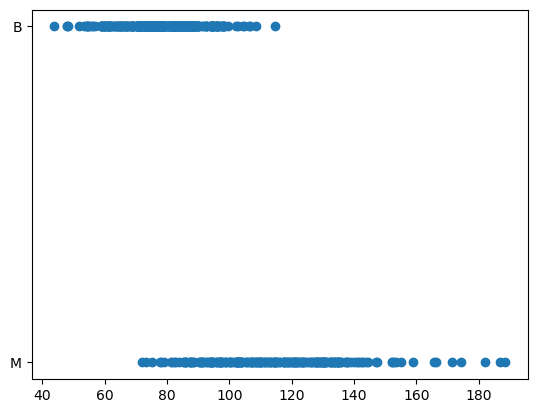

In [55]:
plt.scatter(x='perimeter_mean', y='diagnosis', data=df)

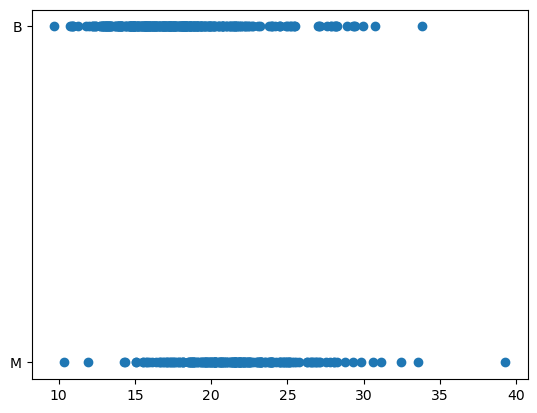

In [56]:
plt.scatter(x='texture_mean', y='diagnosis', data=df)
#not very trustable

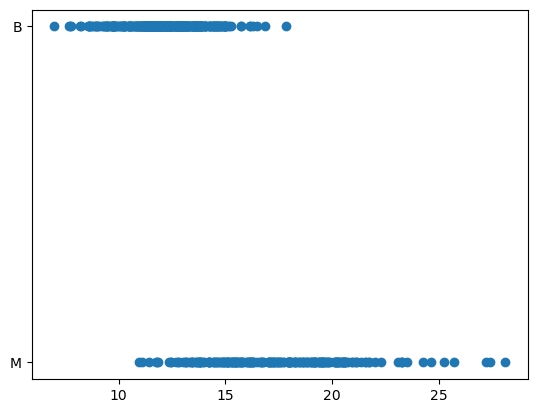

In [57]:
plt.scatter(x='radius_mean', y='diagnosis', data=df)

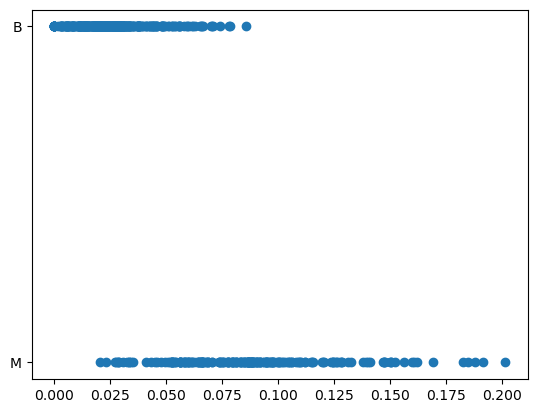

In [58]:
plt.scatter(x='concave_points_mean', y='diagnosis', data=df)

In [59]:
outliers = ['874858', '84348301', '84501001', '84348301', '8611555', '86355', '873593', '84501001', '84348301',
'859471', '84501001', '925622', '84501001', '851509', '8611555', '873592', '88299702',
'88995002', '89812', '899987', '9011971', '911296202', '915143', '91762702',
'8611555', '86355', '873592', '88299702', '88995002', '89812', '899987', '911296202', '915143',
'91762702', '873592', '88299702', '88995002', '89812', '899987', '9011971', '911296202',
'915143', '91376702', '84348301', '8610862', '894047', '865423', '881094802', '894047',
'915276', '865423', '8810703', '9011971', '911296202', '846226', '86355', '8810703', '887181',
'911296202', '8810703', '911296202', '8710441', '873592', '8810703', '899987', '911296202']

outliers = list(dict.fromkeys(outliers))

### 4.2) Boxplots

Separating features by measures (mean, se, worst)

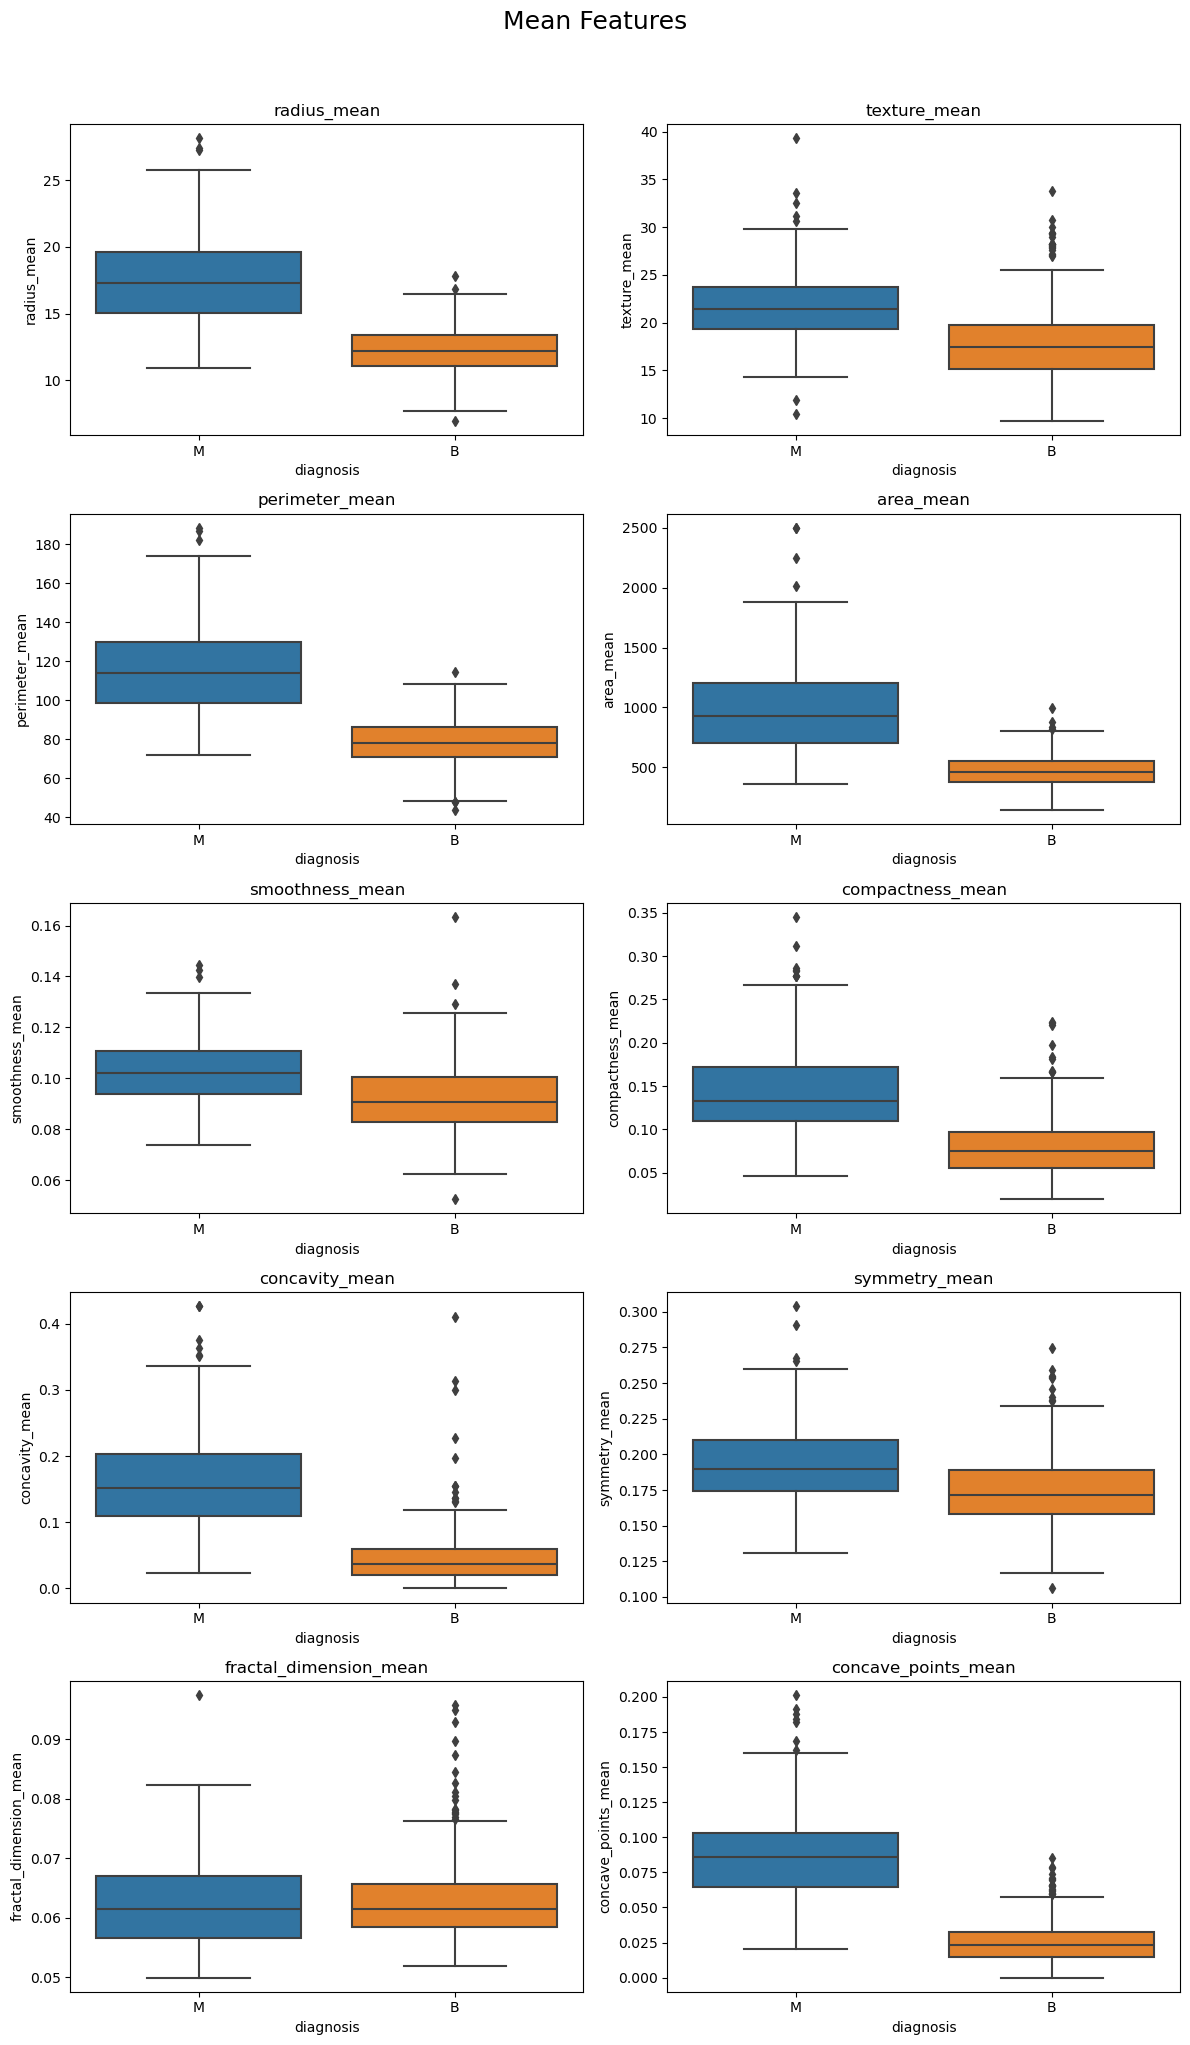

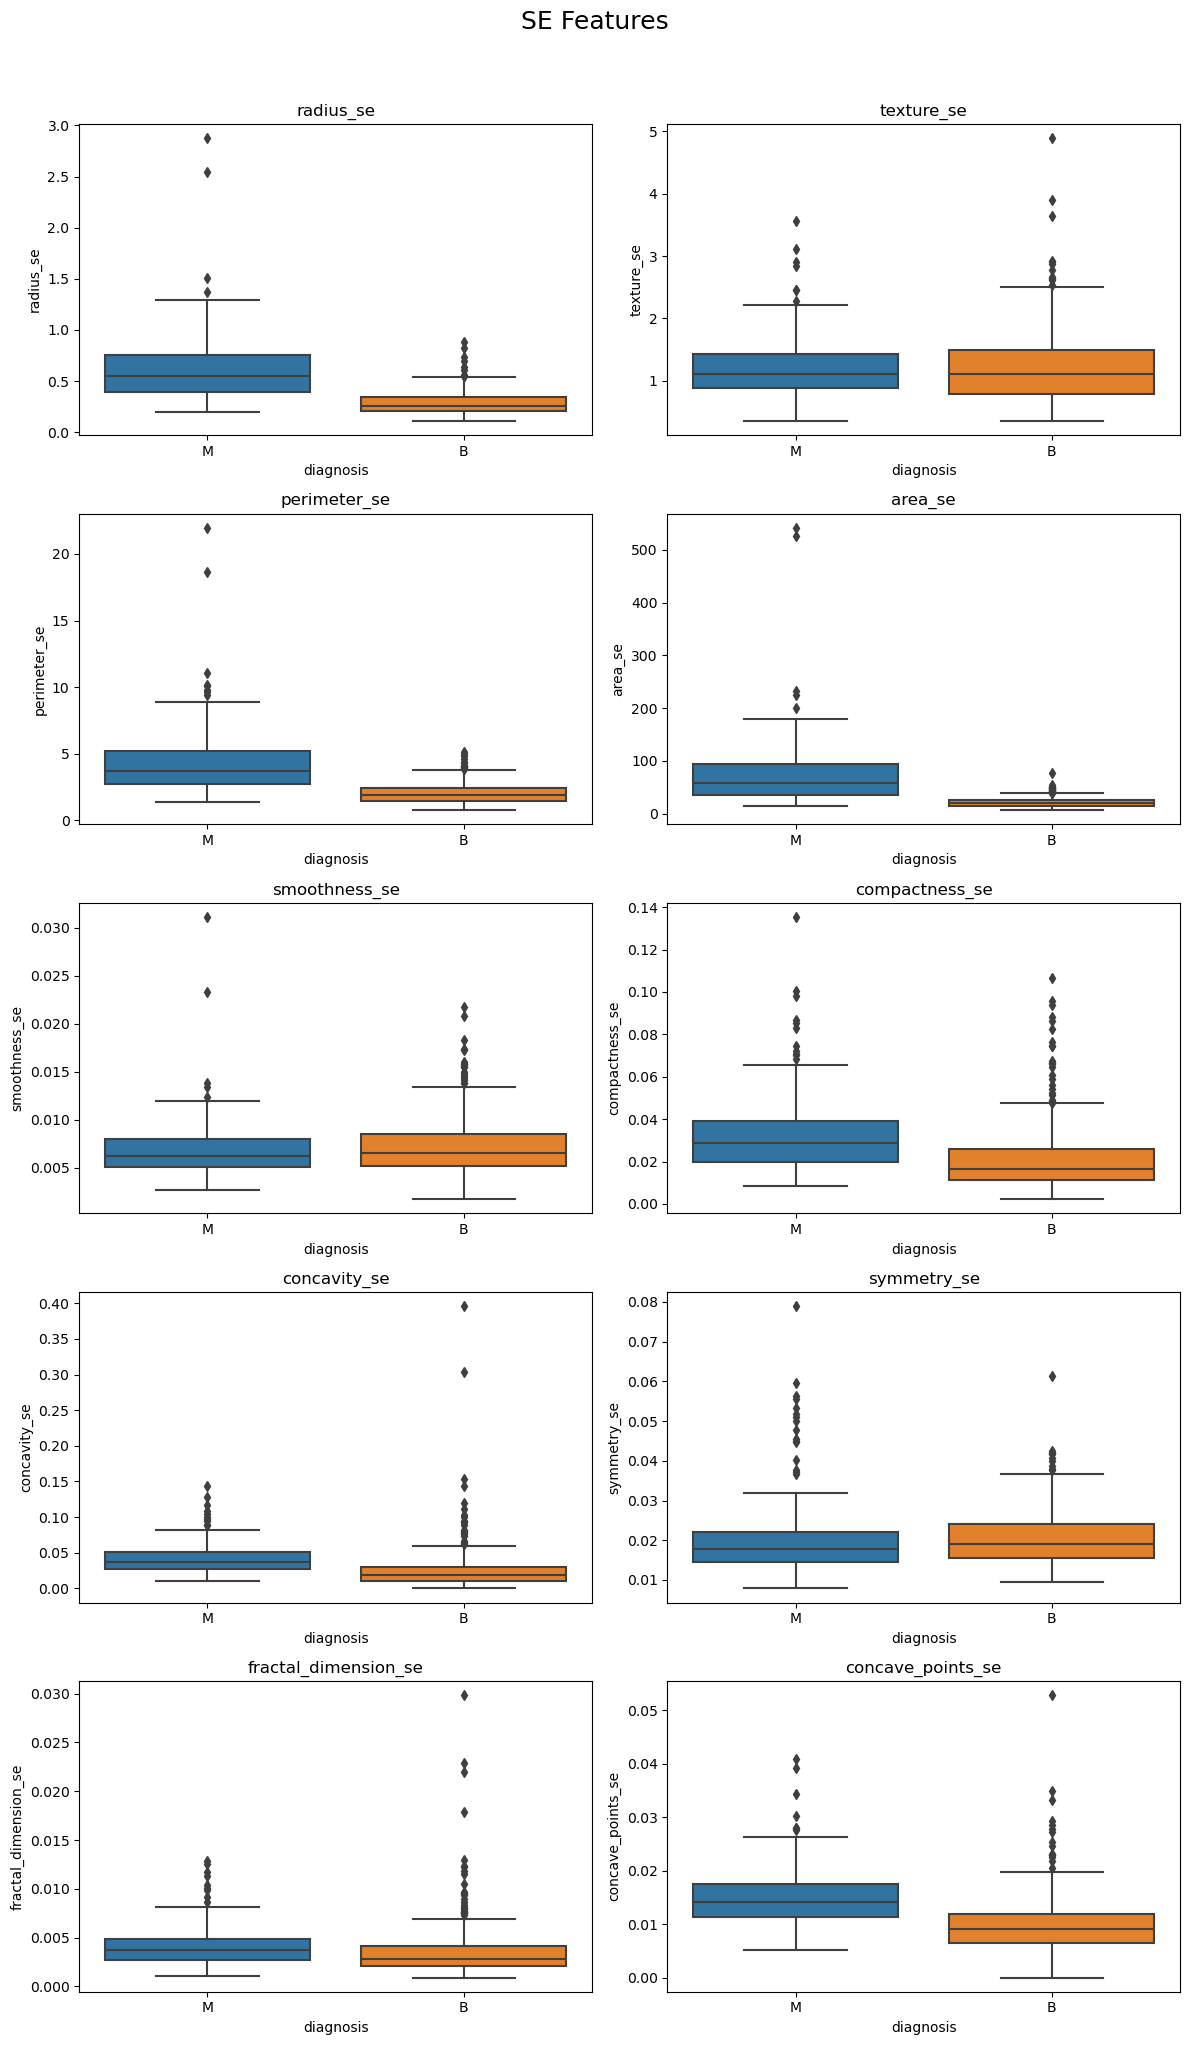

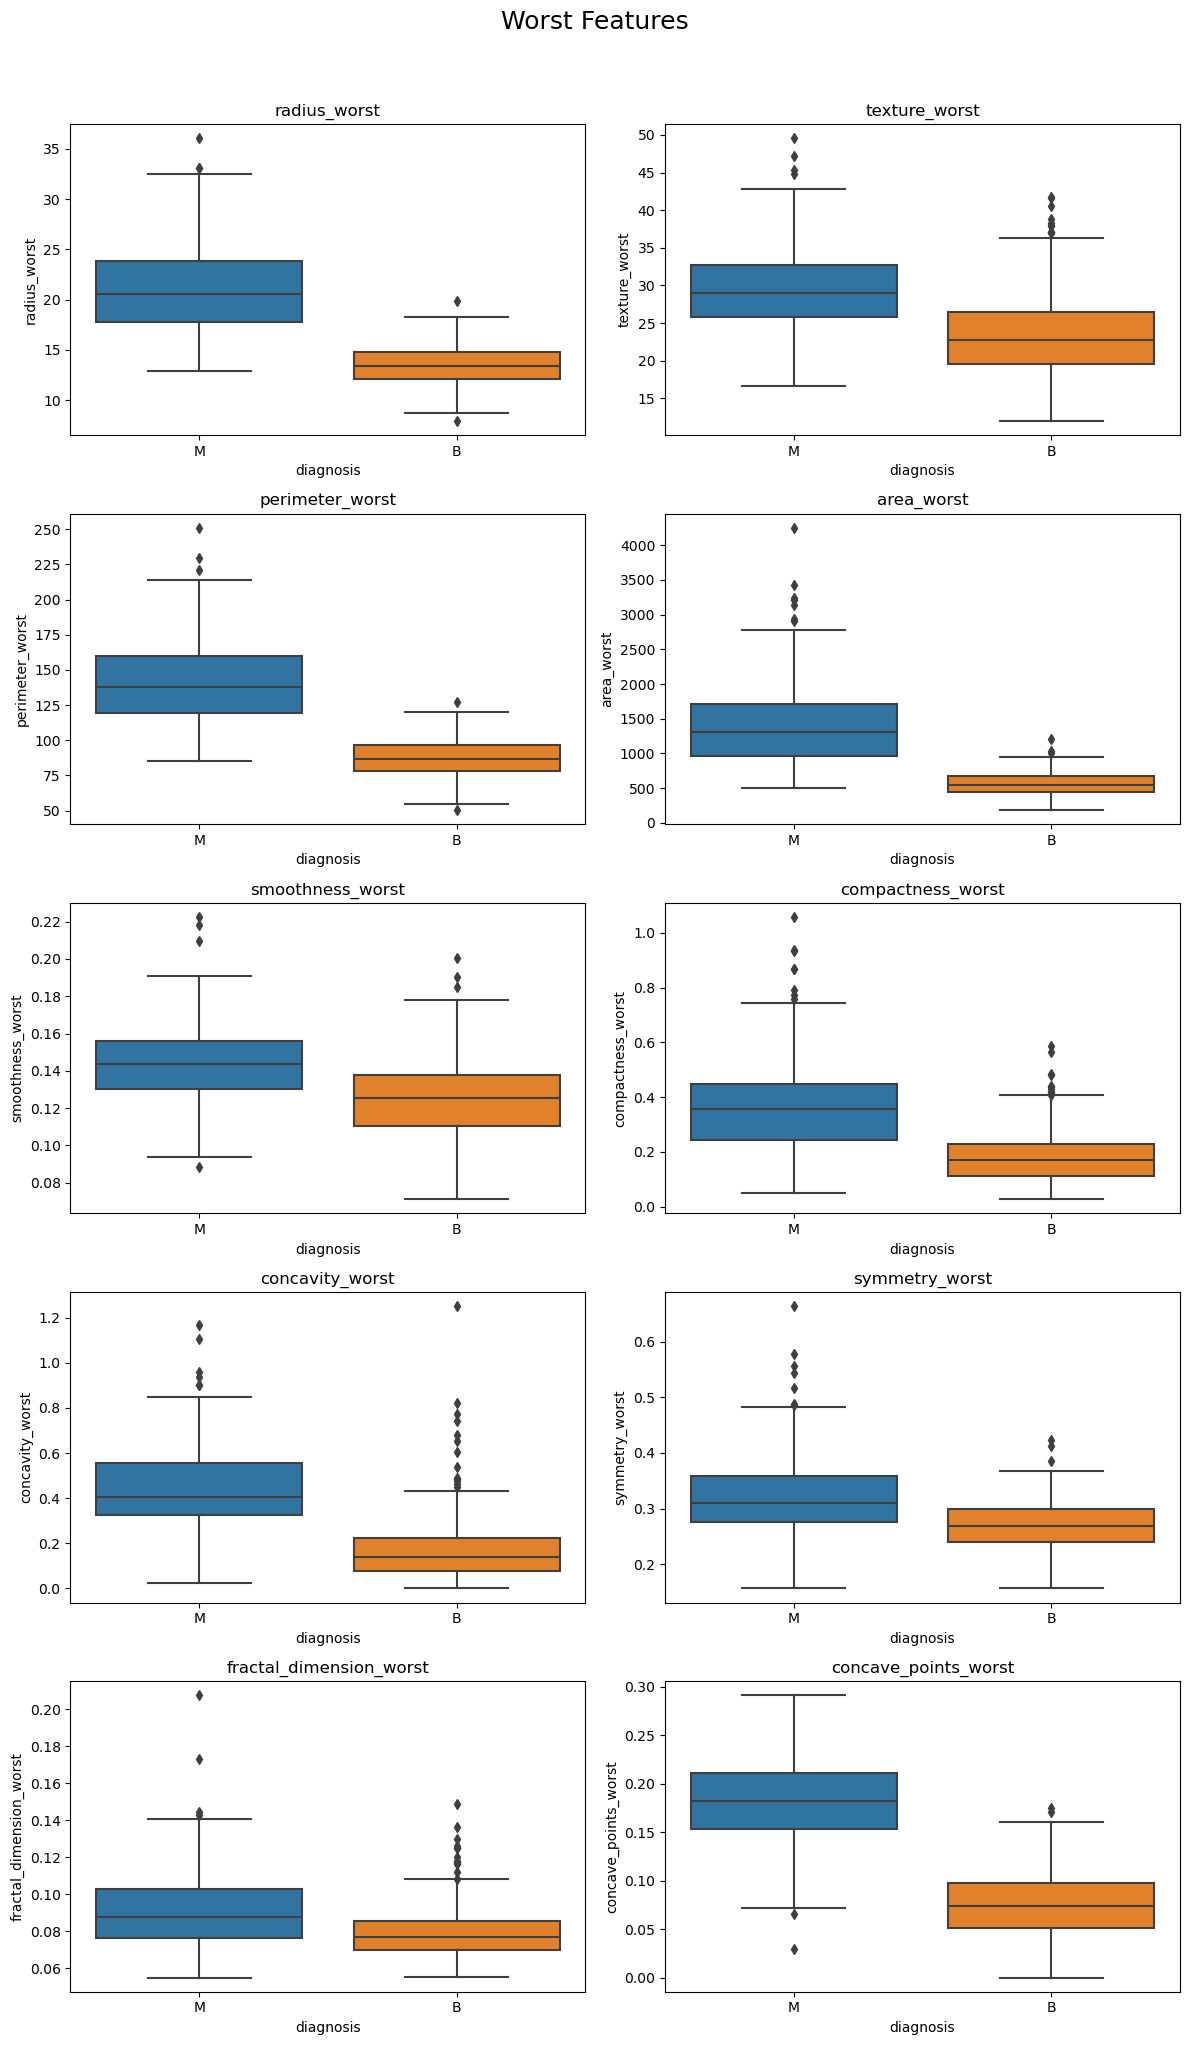

In [60]:
features_to_plot = df.drop(columns=['id', 'diagnosis'])

mean_features  = [f for f in features_to_plot if f.endswith('_mean')]
se_features    = [f for f in features_to_plot if f.endswith('_se')]
worst_features = [f for f in features_to_plot if f.endswith('_worst')]

# --- Função para criar grid 2xN ---
def plot_grid(features, title):
    cols = 2
    rows = math.ceil(len(features) / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*4))
    axes = axes.flatten()

    for i, feat in enumerate(features):
        sns.boxplot(x=df["diagnosis"], y=df[feat], ax=axes[i])
        axes[i].set_title(feat)

    fig.suptitle(title, fontsize=18, y=1.02)
    plt.tight_layout()
    plt.show()

plot_grid(mean_features, "Mean Features")

plot_grid(se_features, "SE Features")

plot_grid(worst_features, "Worst Features")

### 4.3) Heatmaps

C:\Users\VVMAT\anaconda3\Lib\site-packages\kaleido\_sync_server.py:11: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




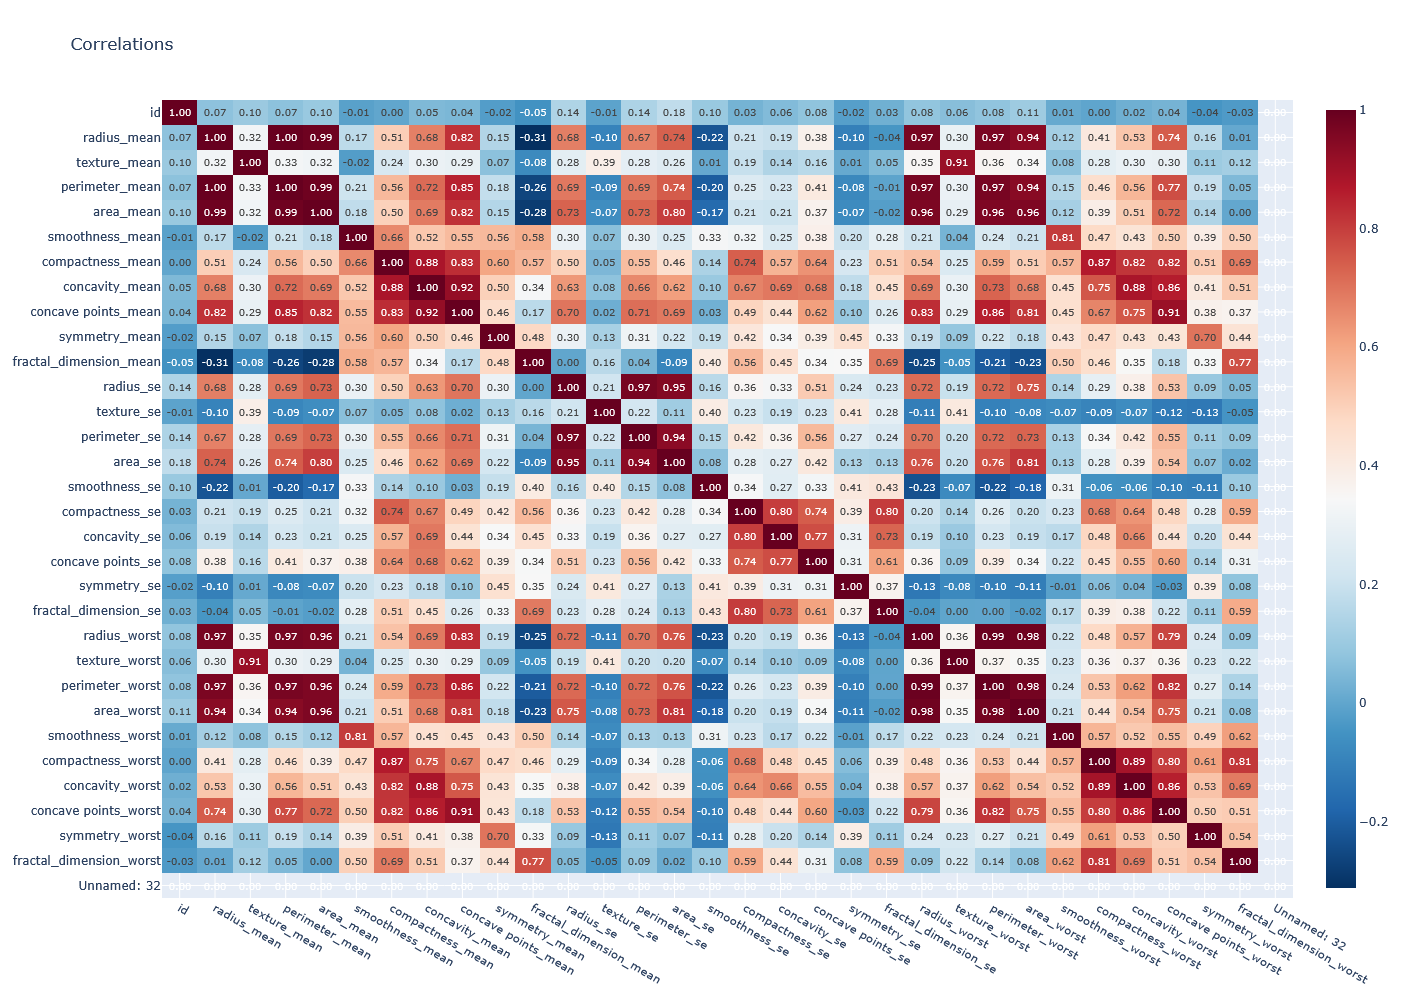

In [3]:
correlation_matrix = df.corr(numeric_only=True)

fig = px.imshow(
    correlation_matrix,
    text_auto=".2f",
    color_continuous_scale="RdBu_r",
    aspect="auto",
    title="Correlations"
)

fig.update_layout(
    width=1400,
    height=1000,
)
fig.show()

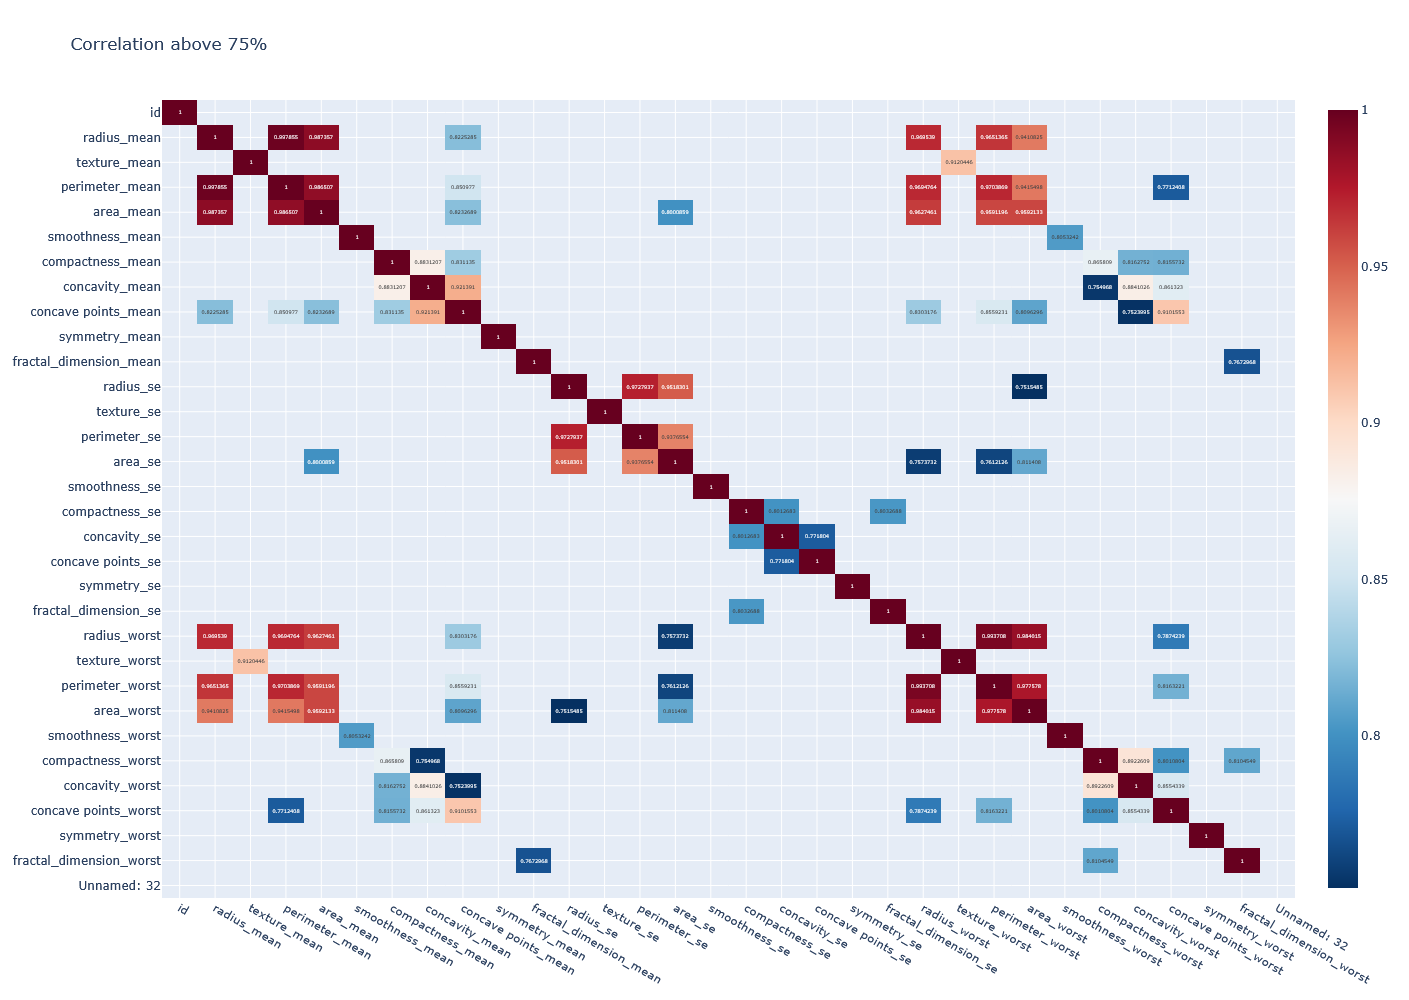

In [7]:
mask = correlation_matrix.abs() > 0.75

# aplica máscara e substitui valores baixos por NaN
filtered_corr = correlation_matrix.where(mask)

fig_filtered = px.imshow(
    filtered_corr,
    text_auto=True,
    color_continuous_scale="RdBu_r",
    aspect="auto",
    title="Correlation above 75%"
)
fig_filtered.update_layout(
    width=1400,
    height=1000)
fig_filtered.write_html("../imgs/heatmap_75%.html")
fig_filtered.show()

In [ ]:
selected_features = [
    "compactness_se", "fractal_dimension_worst", "symmetry_worst",
    "concavity_worst", "smoothness_worst", "texture_worst",
    "fractal_dimension_se", "concavity_se", "smoothness_se",
    "texture_se", "fractal_dimension_mean", "symmetry_mean",
    "concavity_mean", "smoothness_mean", "texture_mean"
]

corr_selected = correlation_matrix.loc[selected_features, selected_features]

fig_selected = px.imshow(
    corr_selected,
    text_auto=".2f",
    color_continuous_scale="RdBu_r",
    aspect="auto",
    title="Selected Feature Correlation"
)

fig_selected.update_layout(
    width=1400,
    height=1000,
)
fig_selected.show()

### 4.4) VIF - Variance inflation factor

In [ ]:
# VIF
X = df.select_dtypes(include=['float64', 'int64']).copy()

vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar ordenado
vif.sort_values(by="VIF", ascending=False)

## 5. Statistical Summary by Class

Descriptive statistics (mean, median, std) grouped by the diagnosis. Helping quantify the separation between malignant (M) and benign (B) tumors.

In [ ]:
num_features = df.drop(columns=['id', 'diagnosis']).columns

# Mean values
display(df.groupby('diagnosis')[num_features].mean().round(3))

# Median values
display(df.groupby('diagnosis')[num_features].median().round(3))

# Standard deviation
display(df.groupby('diagnosis')[num_features].std().round(3))

## 6) Conclusion

The dataset contains 29 numerical features (after removing `Id`, `diagnosis`, and the empty column `Unnamed: 32`), with no missing values.

Several outliers were detected across different features. A closer inspection revealed that many of these extreme values correspond to malignant tumors, meaning they likely represent clinically meaningful cases rather than noise or measurement errors. For this reason, removing outliers would risk discarding precisely the samples that help the model distinguish between benign and malignant tumors. Instead of eliminating them, the outliers were documented in the variable `outliers` for further inspection and domain-specific interpretation.

The analysis shows strong multicollinearity among features, especially between the `mean`, `se`, and `worst` versions of each measurement. This suggests that dimensionality reduction or feature selection techniques may be required in the modeling step.

The correlation matrix reveals strong relationships between tumor size–related features (such as perimeter, radius, concavity, and concave points), which are known to be highly predictive of the diagnosis. Meanwhile, the `selected_features` group appears to have weaker correlation with the target variable and may contribute less to the classification task.

Overall, the dataset is well-structured and clean, but presents challenges such as feature redundancy and class imbalance (≈62% benign, 38% malignant). These findings will guide the next stages of preprocessing, model selection, and evaluation.

### Top insights

1. **Understanding Feature Groups (mean / se / worst)**  
   The dataset provides three versions of each measurement:  
   - **_mean** → Average value of the measurement across the tumor boundary.  
   - **_se** → Standard error (variability) of the measurement.  
   - **_worst** → Maximum or “worst-case” value observed in a set of 10 frames.  
   These groups often behave as correlated clusters:  
   - `_mean` features capture the overall structure of the tumor.  
   - `_se` features capture variability and are typically noisier.  
   - `_worst` features tend to be the most relevant for classification tasks.

2. The dataset contains no missing values and is fully numerical after removing irrelevant columns.

3. Strong multicollinearity is present, particularly among the `_mean`, `_se`, and `_worst` feature groups.

4. `_se` features generally show weaker separation and higher noise.

5. Class imbalance is mild (≈62% benign, 38% malignant), suggesting the use of stratified cross-validation.

6. Outliers exist but many correspond to malignant tumors, meaning they contain valuable signal and should not be removed blindly.

7. Several features have extremely high correlation with the diagnosis (e.g., `radius_worst`, `perimeter_worst`, `concave_points_worst`), indicating strong predictive power.

8. VIF analysis reinforces the need for feature selectio